### This script relies on a active environment with Basemap
If that is not possible, you properly have to outcomment a thing or two.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
import ezodf

In [63]:
airports_1 = gpd.read_file('Data Sources/Global Airports Shapefile (1)/ne_10m_airports.shp')
ports_1 = gpd.read_file('Data Sources/Global Ports Shapefile (1)/WPI.shp')
countries = gpd.read_file('Data Sources/countries (1)/ne_50m_admin_0_countries.shp')
globalFreight = pd.read_csv('Data Sources/Global Air Freight (1)/Air_Transported_Goods.csv',header=2).fillna(value=0)
globalPassengers = pd.read_csv('Data Sources/Global Passengers Carried (1)/Passengers_Carried.csv',header=2).fillna(value=0)

### Let's have a look at the first shapefile

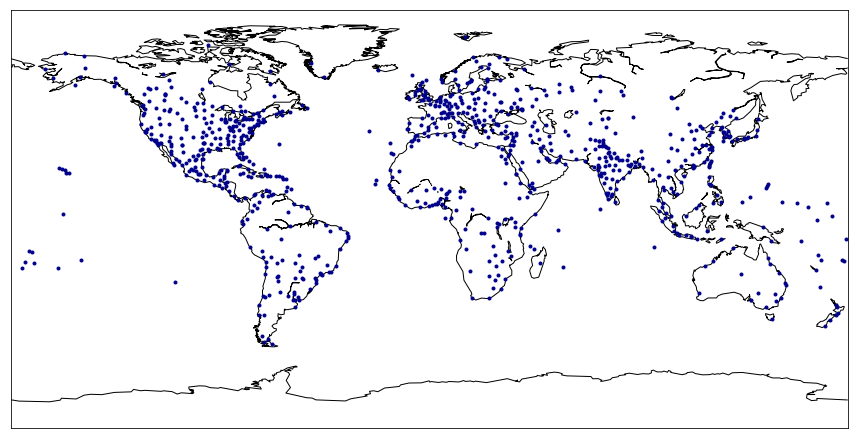

In [5]:
##### Visualising the airports
plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for airport in airports_1.index:
    map.plot(list(airports_1.loc[airport].geometry.coords)[0][0],
            list(airports_1.loc[airport].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [64]:
airports_1.shape

(891, 36)

In [65]:
airports_1.columns

Index(['scalerank', 'featurecla', 'type', 'name', 'abbrev', 'location',
       'gps_code', 'iata_code', 'wikipedia', 'natlscale', 'comments',
       'wikidataid', 'name_ar', 'name_bn', 'name_de', 'name_en', 'name_es',
       'name_fr', 'name_el', 'name_hi', 'name_hu', 'name_id', 'name_it',
       'name_ja', 'name_ko', 'name_nl', 'name_pl', 'name_pt', 'name_ru',
       'name_sv', 'name_tr', 'name_vi', 'name_zh', 'wdid_score', 'ne_id',
       'geometry'],
      dtype='object')

In [66]:
airports_1.location.unique()

array(['terminal', 'ramp', 'runway', 'approximate', 'parking', 'freight'],
      dtype=object)

In [67]:
{airportLocation:sum([1 if thisLocation == airportLocation else 0 for thisLocation in airports_1['location']])\
 for airportLocation in airports_1['location'].unique()}

{'terminal': 782,
 'ramp': 56,
 'runway': 37,
 'approximate': 8,
 'parking': 7,
 'freight': 1}

In [68]:
# Removed columns are 'featurecla' (not varity) and all the name-columns in different languages. 
airports = airports_1[['scalerank','type','name','abbrev','location','gps_code','iata_code','wikipedia',\
                      'wdid_score','ne_id','geometry']]

In [69]:
airports = gpd.sjoin(airports,countries, how='left')

In [70]:
airports.columns[0:81]

Index(['scalerank_left', 'type', 'name', 'abbrev', 'location', 'gps_code',
       'iata_code', 'wikipedia', 'wdid_score', 'ne_id', 'geometry',
       'index_right', 'featurecla', 'scalerank_right', 'LABELRANK',
       'SOVEREIGNT', 'SOV_A3', 'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3',
       'GEOU_DIF', 'GEOUNIT', 'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3',
       'BRK_DIFF', 'NAME', 'NAME_LONG', 'BRK_A3', 'BRK_NAME', 'BRK_GROUP',
       'ABBREV', 'POSTAL', 'FORMAL_EN', 'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0',
       'NOTE_BRK', 'NAME_SORT', 'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8',
       'MAPCOLOR9', 'MAPCOLOR13', 'POP_EST', 'POP_RANK', 'GDP_MD_EST',
       'POP_YEAR', 'LASTCENSUS', 'GDP_YEAR', 'ECONOMY', 'INCOME_GRP',
       'WIKIPEDIA', 'FIPS_10_', 'ISO_A2', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3',
       'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID', 'WOE_ID_EH', 'WOE_NOTE',
       'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN', 'ADM0_A3_WB', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_LE

In [71]:
airports.columns[81:-1]

Index(['MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI',
       'NAME_HU', 'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL',
       'NAME_PL', 'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI'],
      dtype='object')

In [72]:
isoCodes = []
for i,iso in enumerate(airports['ISO_A3']):
    
    if iso == '-99':
        isoCodes.append(airports.SOV_A3.loc[i])
        #print(airports.SOV_A3.loc[i])
        #print(airports.ISO_A3.loc[i])
    else:
        isoCodes.append(airports.ISO_A3.loc[i])

In [73]:
airports = airports[['scalerank_left','type','name','abbrev','location','gps_code','iata_code','wikipedia',\
                      'wdid_score','ne_id','geometry','NAME']]

In [74]:
airports['ISO3'] = isoCodes

In [75]:
airports.head()

,scalerank_left,type,name,abbrev,location,gps_code,iata_code,wikipedia,wdid_score,ne_id,geometry,NAME,ISO3
0,9,small,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,4,1159113785,POINT (75.95707224036518 30.85035985617018),India,IND
1,9,mid,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,4,1159113803,POINT (75.93305977107549 17.62541518363502),India,IND
2,9,mid,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,4,1159113831,POINT (85.32359703687671 23.31772459899619),India,IND
3,9,mid,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,4,1159113845,POINT (48.74710654359313 31.34315855607572),Iran,IRN
4,9,mid and military,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,4,1159113863,POINT (78.21721865463483 26.28548769793701),India,IND


In [76]:
airports['type'].unique()

array(['small', 'mid', 'mid and military', 'major and military',
       'military mid', 'military', 'major', 'military major', 'spaceport'],
      dtype=object)

In [77]:
{airportType:sum([1 if thisType == airportType else 0 for thisType in airports['type']])\
 for airportType in airports['type'].unique()}

{'small': 2,
 'mid': 475,
 'mid and military': 14,
 'major and military': 14,
 'military mid': 10,
 'military': 2,
 'major': 367,
 'military major': 4,
 'spaceport': 3}

In [32]:
airports.dtypes

scalerank_left     int64
type              object
name              object
abbrev            object
location          object
gps_code          object
iata_code         object
wikipedia         object
wdid_score         int64
ne_id              int64
geometry          object
NAME              object
ISO_A3            object
dtype: object

In [82]:
# Based on this answer: https://gis.stackexchange.com/questions/159681/geopandas-cant-save-geojson
with open('Final Data/airports.geojson', 'w') as f:
    f.write(airports.to_json())

In [84]:
airportsPD = pd.DataFrame(airports)
airportsPD.to_csv('Final Data/Airports.csv')

In [89]:
{country:sum([1 if name == country else 0 for name in airports.NAME]) for country in airports.NAME.unique()}

{'India': 50,
 'Iran': 9,
 'Yemen': 4,
 'Pakistan': 9,
 'Russia': 26,
 'Ukraine': 8,
 'Indonesia': 12,
 'N. Mariana Is.': 2,
 'South Korea': 7,
 'Taiwan': 4,
 'Netherlands': 2,
 'United Kingdom': 16,
 'Tonga': 1,
 'Honduras': 3,
 'Saudi Arabia': 4,
 'Canada': 43,
 'Lithuania': 3,
 'Turkey': 8,
 'United States of America': 131,
 'Australia': 14,
 'Colombia': 6,
 'Mexico': 39,
 'Nigeria': 11,
 'Bulgaria': 2,
 'Germany': 11,
 'Venezuela': 4,
 'Slovakia': 1,
 nan: 0,
 'China': 37,
 'Romania': 2,
 'Cuba': 4,
 'Philippines': 4,
 'Italy': 10,
 'Uruguay': 4,
 'Faeroe Is.': 1,
 'Guatemala': 2,
 'Bahamas': 3,
 'Thailand': 5,
 'Egypt': 7,
 'Tanzania': 3,
 'Dem. Rep. Congo': 6,
 'Ghana': 2,
 'Chile': 9,
 'Syria': 3,
 'Jamaica': 1,
 'Myanmar': 2,
 'Ecuador': 2,
 'Norfolk Island': 1,
 'Algeria': 3,
 'South Africa': 5,
 'Dominican Rep.': 2,
 'Bangladesh': 2,
 'Greenland': 2,
 'Montenegro': 1,
 'Zimbabwe': 3,
 'Macedonia': 1,
 'North Korea': 2,
 'Poland': 4,
 'Kazakhstan': 4,
 'Iraq': 3,
 'Finland': 4

In [90]:
airports[airports.NAME=='United Kingdom']

,scalerank_left,type,name,abbrev,location,gps_code,iata_code,wikipedia,wdid_score,ne_id,geometry,NAME
37,8,major,Liverpool John Lennon,LPL,ramp,EGGP,LPL,http://en.wikipedia.org/wiki/Liverpool_John_Le...,4,1159114447,POINT (-2.858620657849379 53.33637510544222),United Kingdom
41,8,major,Newcastle Int'l,NCL,terminal,EGNT,NCL,http://en.wikipedia.org/wiki/Newcastle_Airport,4,1159114519,POINT (-1.71034578407216 55.03708486080195),United Kingdom
67,8,major,Bristol Int'l,BRS,terminal,EGGD,BRS,http://en.wikipedia.org/wiki/Bristol_Internati...,4,1159114989,POINT (-2.710864691343084 51.38629341891484),United Kingdom
85,8,major,Cardiff,CWL,terminal,EGFF,CWL,http://en.wikipedia.org/wiki/Cardiff_Airport,4,1159115353,POINT (-3.339568764291176 51.39862209110174),United Kingdom
95,8,major,Edinburgh Int'l,EDI,terminal,EGPH,EDI,http://en.wikipedia.org/wiki/Edinburgh_Airport,4,1159115559,POINT (-3.364284685135545 55.9485540113639),United Kingdom
123,8,mid,Inverness,INV,terminal,EGPE,INV,http://en.wikipedia.org/wiki/Inverness_Airport,4,1159116141,POINT (-4.063591755871405 57.53950029234238),United Kingdom
136,8,mid,Kirkwall,KOI,ramp,EGPA,KOI,http://en.wikipedia.org/wiki/Kirkwall_Airport,4,1159116405,POINT (-2.901378495245077 58.95442887883035),United Kingdom
147,8,major,London Luton,LTN,terminal,EGGW,LTN,http://en.wikipedia.org/wiki/London_Luton_Airport,4,1159116605,POINT (-0.3762272673974393 51.8802952570969),United Kingdom
327,7,major,Leeds Bradford,LBA,terminal,EGNM,LBA,http://en.wikipedia.org/wiki/Leeds_Bradford_In...,4,1159119807,POINT (-1.659831067347459 53.86908194744343),United Kingdom
347,7,mid,Glasgow Prestwick,PIK,terminal,EGPK,PIK,http://en.wikipedia.org/wiki/Glasgow_Prestwick...,4,1159120173,POINT (-4.610971639010682 55.50889181051421),United Kingdom


### Let's take a look at the UK Data

In [108]:
UKAirportsFreight = pd.read_csv('Data Sources/UK Airport Data (2)/Table_13_Freight_by_Type_and_Nationality(1).csv',
                                parse_dates = ['rundate'])

In [109]:
UKAirportsFreight

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_freight,freight_set_down_scheduled_UK,freight_picked_up_scheduled_UK,freight_set_down_scheduled_foreign_EU,freight_picked_up_scheduled_foreign_EU,freight_set_down_scheduled_foreign_non_EU,freight_picked_up_scheduled_foreign_non_EU,freight_set_down_charter_UK,freight_picked_up_charter_UK,freight_set_down_charter_foreign_EU,freight_picked_up_charter_foreign_EU,freight_set_down_charter_foreign_non_EU,freight_picked_up_charter_foreign_non_EU
0,2019-04-12 14:30:31,201902,London Area Airports,GATWICK,8608.969,1601.790,4120.024,18.855,32.633,1056.073,1616.481,98.721,64.392,0.000,0.000,0.000,0.000
1,2019-04-12 14:30:31,201902,London Area Airports,HEATHROW,128064.672,23871.258,29608.274,2931.209,2370.728,33903.267,35379.936,0.000,0.000,0.000,0.000,0.000,0.000
2,2019-04-12 14:30:31,201902,London Area Airports,LUTON,3062.702,0.000,0.000,2482.777,173.315,249.871,152.767,0.000,3.972,0.000,0.000,0.000,0.000
3,2019-04-12 14:30:31,201902,London Area Airports,STANSTED,14591.857,240.881,21.150,924.600,256.402,7503.910,5582.581,0.000,0.000,0.000,0.000,62.333,0.000
4,2019-04-12 14:30:31,201902,Other UK Airports,ABERDEEN,450.834,3.273,12.331,6.838,13.057,9.556,7.460,49.521,72.446,163.281,113.071,0.000,0.000
5,2019-04-12 14:30:31,201902,Other UK Airports,BARRA,0.941,0.941,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,2019-04-12 14:30:31,201902,Other UK Airports,BELFAST CITY (GEORGE BEST),15.131,8.760,5.304,0.935,0.132,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
7,2019-04-12 14:30:31,201902,Other UK Airports,BELFAST INTERNATIONAL,2172.945,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.596,1420.772,740.664,0.000,4.913
8,2019-04-12 14:30:31,201902,Other UK Airports,BENBECULA,2.621,2.122,0.499,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
9,2019-04-12 14:30:31,201902,Other UK Airports,BIRMINGHAM,2145.088,14.071,12.889,74.611,44.148,1133.689,858.399,0.981,0.246,0.000,0.000,6.054,0.000


In [110]:
UKAirportsFreight.sort_values(by=['total_freight'],ascending = False)

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_freight,freight_set_down_scheduled_UK,freight_picked_up_scheduled_UK,freight_set_down_scheduled_foreign_EU,freight_picked_up_scheduled_foreign_EU,freight_set_down_scheduled_foreign_non_EU,freight_picked_up_scheduled_foreign_non_EU,freight_set_down_charter_UK,freight_picked_up_charter_UK,freight_set_down_charter_foreign_EU,freight_picked_up_charter_foreign_EU,freight_set_down_charter_foreign_non_EU,freight_picked_up_charter_foreign_non_EU
1,2019-04-12 14:30:31,201902,London Area Airports,HEATHROW,128064.672,23871.258,29608.274,2931.209,2370.728,33903.267,35379.936,0.000,0.000,0.000,0.000,0.000,0.000
12,2019-04-12 14:30:31,201902,Other UK Airports,EAST MIDLANDS INTERNATIONAL,24427.571,1151.708,1027.371,3671.294,4317.857,2260.787,1850.626,2.043,0.000,4906.103,5151.560,67.556,20.666
3,2019-04-12 14:30:31,201902,London Area Airports,STANSTED,14591.857,240.881,21.150,924.600,256.402,7503.910,5582.581,0.000,0.000,0.000,0.000,62.333,0.000
0,2019-04-12 14:30:31,201902,London Area Airports,GATWICK,8608.969,1601.790,4120.024,18.855,32.633,1056.073,1616.481,98.721,64.392,0.000,0.000,0.000,0.000
21,2019-04-12 14:30:31,201902,Other UK Airports,MANCHESTER,7747.965,238.615,481.956,56.314,44.409,3581.368,3269.226,37.848,17.283,1.260,0.000,0.001,19.685
2,2019-04-12 14:30:31,201902,London Area Airports,LUTON,3062.702,0.000,0.000,2482.777,173.315,249.871,152.767,0.000,3.972,0.000,0.000,0.000,0.000
7,2019-04-12 14:30:31,201902,Other UK Airports,BELFAST INTERNATIONAL,2172.945,0.000,0.000,0.000,0.000,0.000,0.000,0.000,6.596,1420.772,740.664,0.000,4.913
9,2019-04-12 14:30:31,201902,Other UK Airports,BIRMINGHAM,2145.088,14.071,12.889,74.611,44.148,1133.689,858.399,0.981,0.246,0.000,0.000,6.054,0.000
11,2019-04-12 14:30:31,201902,Other UK Airports,DONCASTER SHEFFIELD,1532.069,0.000,0.000,0.000,0.000,1337.284,3.897,0.000,0.000,0.000,0.000,0.000,190.888
13,2019-04-12 14:30:31,201902,Other UK Airports,EDINBURGH,1414.763,1.339,0.000,335.121,304.876,0.000,0.000,0.000,0.000,435.799,337.628,0.000,0.000


In [111]:
UKAirportsFreight = UKAirportsFreight.sort_values(by=['total_freight'],ascending = False)
UKAirportsFreight = UKAirportsFreight.reset_index(drop=True)
topFiveUKAirports = UKAirportsFreight.loc[0:4]

In [112]:
topFiveUKAirports

,rundate,reporting_period,reporting_airport_group_name,reporting_airport_name,total_freight,freight_set_down_scheduled_UK,freight_picked_up_scheduled_UK,freight_set_down_scheduled_foreign_EU,freight_picked_up_scheduled_foreign_EU,freight_set_down_scheduled_foreign_non_EU,freight_picked_up_scheduled_foreign_non_EU,freight_set_down_charter_UK,freight_picked_up_charter_UK,freight_set_down_charter_foreign_EU,freight_picked_up_charter_foreign_EU,freight_set_down_charter_foreign_non_EU,freight_picked_up_charter_foreign_non_EU
0,2019-04-12 14:30:31,201902,London Area Airports,HEATHROW,128064.672,23871.258,29608.274,2931.209,2370.728,33903.267,35379.936,0.000,0.000,0.000,0.00,0.000,0.000
1,2019-04-12 14:30:31,201902,Other UK Airports,EAST MIDLANDS INTERNATIONAL,24427.571,1151.708,1027.371,3671.294,4317.857,2260.787,1850.626,2.043,0.000,4906.103,5151.56,67.556,20.666
2,2019-04-12 14:30:31,201902,London Area Airports,STANSTED,14591.857,240.881,21.150,924.600,256.402,7503.910,5582.581,0.000,0.000,0.000,0.00,62.333,0.000
3,2019-04-12 14:30:31,201902,London Area Airports,GATWICK,8608.969,1601.790,4120.024,18.855,32.633,1056.073,1616.481,98.721,64.392,0.000,0.00,0.000,0.000
4,2019-04-12 14:30:31,201902,Other UK Airports,MANCHESTER,7747.965,238.615,481.956,56.314,44.409,3581.368,3269.226,37.848,17.283,1.260,0.00,0.001,19.685


In [114]:
airports[airports.abbrev == 'LHR'] 

,scalerank_left,type,name,abbrev,location,gps_code,iata_code,wikipedia,wdid_score,ne_id,geometry,NAME
832,2,major,London Heathrow,LHR,parking,EGLL,LHR,http://en.wikipedia.org/wiki/London_Heathrow_A...,4,1159127237,POINT (-0.4531566520633094 51.47099587999384),United Kingdom


In [115]:
print('The top five UK airports are:\n')
[print(topFiveName.lower()) for topFiveName in topFiveUKAirports.reporting_airport_name]

print('\nHow many of the top five airports in UK are in the first shapefile? Answer:',
      sum([1 if any([True if topFiveName.lower() in name.lower() else False for name in airports.name])\
           else 0 for topFiveName in topFiveUKAirports.reporting_airport_name]))

The top five UK airports are:

heathrow
east midlands international
stansted
gatwick
manchester

How many of the top five airports in UK are in the first shapefile? Answer: 3


In [117]:
print('Which are the airports present?\n')
[print(topFiveName) if any([True if topFiveName.lower() in name.lower() else False for name in airports.name])\
           else 0 for topFiveName in topFiveUKAirports.reporting_airport_name]
print()

Which are the airports present?

HEATHROW
GATWICK
MANCHESTER



### Let's see the ports.

#### First shapefile (WPI)

In [91]:
ports_1 = gpd.read_file('Data Sources/Global Ports Shapefile (1)/WPI.shp').fillna(value='NaN')

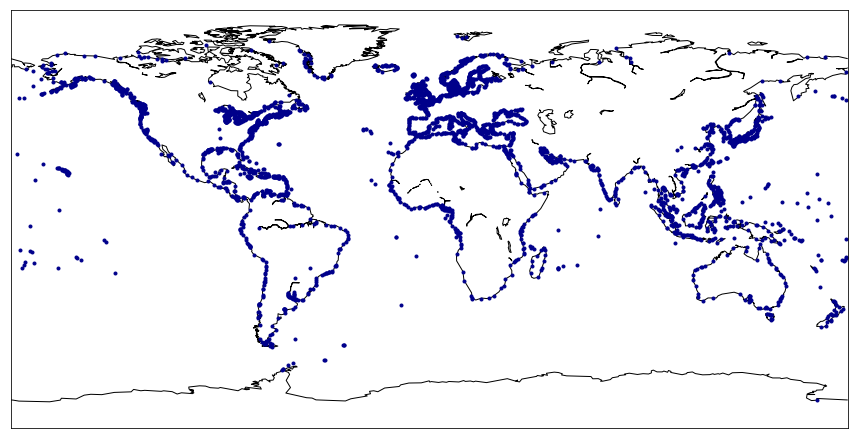

In [111]:
# Let's visualise the ports
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in ports_1.index:
    map.plot(list(ports_1.loc[port].geometry.coords)[0][0],
            list(ports_1.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [92]:
ports_1.columns

Index(['INDEX_NO', 'REGION_NO', 'PORT_NAME', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'LAT_DEG', 'LAT_MIN', 'LAT_HEMI', 'LONG_DEG', 'LONG_MIN',
       'LONG_HEMI', 'PUB', 'CHART', 'HARBORSIZE', 'HARBORTYPE', 'SHELTER',
       'ENTRY_TIDE', 'ENTRYSWELL', 'ENTRY_ICE', 'ENTRYOTHER', 'OVERHD_LIM',
       'CHAN_DEPTH', 'ANCH_DEPTH', 'CARGODEPTH', 'OIL_DEPTH', 'TIDE_RANGE',
       'MAX_VESSEL', 'HOLDGROUND', 'TURN_BASIN', 'PORTOFENTR', 'US_REP',
       'ETAMESSAGE', 'PILOT_REQD', 'PILOTAVAIL', 'LOC_ASSIST', 'PILOTADVSD',
       'TUGSALVAGE', 'TUG_ASSIST', 'PRATIQUE', 'SSCC_CERT', 'QUAR_OTHER',
       'COMM_PHONE', 'COMM_FAX', 'COMM_RADIO', 'COMM_VHF', 'COMM_AIR',
       'COMM_RAIL', 'CARGOWHARF', 'CARGO_ANCH', 'CARGMDMOOR', 'CARBCHMOOR',
       'CARICEMOOR', 'MED_FACIL', 'GARBAGE', 'DEGAUSS', 'DRTYBALLST',
       'CRANEFIXED', 'CRANEMOBIL', 'CRANEFLOAT', 'LIFT_100_', 'LIFT50_100',
       'LIFT_25_49', 'LIFT_0_24', 'LONGSHORE', 'ELECTRICAL', 'SERV_STEAM',
       'NAV_EQUIP', 'ELECREPAIR', '

In [93]:
ports_1.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61090.0,61070.0,SHAKOTAN,RU,43.866667,146.833333,43.0,52.0,N,146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (146.8333333333333 43.86666666666667)
1,61110.0,61100.0,MOMBETSU KO,JP,44.350000,143.350000,44.0,21.0,N,143.0,...,NaN,Y,NaN,Y,NaN,NaN,C,NaN,NaN,POINT (143.35 44.35)
2,61120.0,61100.0,ABASHIRI KO,JP,44.016667,144.283333,44.0,1.0,N,144.0,...,NaN,Y,NaN,Y,NaN,NaN,C,NaN,NaN,POINT (144.2833333333333 44.01666666666667)
3,61130.0,61100.0,NEMURO KO,JP,43.333333,145.583333,43.0,20.0,N,145.0,...,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,POINT (145.5833333333333 43.33333333333334)
4,61140.0,61100.0,HANASAKI KO,JP,43.283333,145.583333,43.0,17.0,N,145.0,...,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,POINT (145.5833333333333 43.28333333333333)


In [94]:
ports_1.shape

(3669, 79)

In [99]:
ports_1.RAILWAY.unique()

array(['NaN', 'M', 'L', 'S'], dtype=object)

In [96]:
ports_1.HARBORSIZE.unique()

array(['V', 'S', 'M', 'L', 'NaN'], dtype=object)

In [97]:
{size:sum([True if obs == size else False for obs in ports_1.HARBORSIZE]) for size in ports_1.HARBORSIZE.unique()}

{'V': 2153, 'S': 990, 'M': 361, 'L': 160, 'NaN': 5}

In [100]:
{size:sum([True if obs == size else False for obs in ports_1.RAILWAY]) for size in ports_1.RAILWAY.unique()}

{'NaN': 2159, 'M': 377, 'L': 146, 'S': 987}

## Joining the countries shapefile with the ports

In [117]:
ports = gpd.sjoin(ports_1,countries,how='left')

In [377]:
ports = ports[['PORT_NAME','LATITUDE','LONGITUDE','HARBORSIZE','HARBORTYPE','RAILWAY','ISO_A3','SOV_A3','NAME','geometry']]

In [378]:
ports.head()

,PORT_NAME,LATITUDE,LONGITUDE,HARBORSIZE,HARBORTYPE,RAILWAY,ISO_A3,SOV_A3,NAME,geometry
0,SHAKOTAN,43.866667,146.833333,V,CN,NaN,NaN,NaN,NaN,POINT (146.8333333333333 43.86666666666667)
1,MOMBETSU KO,44.350000,143.350000,V,CB,NaN,JPN,JPN,Japan,POINT (143.35 44.35)
2,ABASHIRI KO,44.016667,144.283333,S,CB,NaN,JPN,JPN,Japan,POINT (144.2833333333333 44.01666666666667)
3,NEMURO KO,43.333333,145.583333,S,CB,NaN,NaN,NaN,NaN,POINT (145.5833333333333 43.33333333333334)
4,HANASAKI KO,43.283333,145.583333,V,CB,NaN,JPN,JPN,Japan,POINT (145.5833333333333 43.28333333333333)


In [379]:
isoCodesPorts = []
for i,iso in enumerate(ports.ISO_A3):
    if iso == '-99':
        isoCodesPorts.append(ports.SOV_A3.loc[i])
    else:
        isoCodesPorts.append(ports.ISO_A3.loc[i])

In [380]:
ports['ISO3'] = isoCodesPorts

In [381]:
ports.head()

,PORT_NAME,LATITUDE,LONGITUDE,HARBORSIZE,HARBORTYPE,RAILWAY,ISO_A3,SOV_A3,NAME,geometry,ISO3
0,SHAKOTAN,43.866667,146.833333,V,CN,NaN,NaN,NaN,NaN,POINT (146.8333333333333 43.86666666666667),NaN
1,MOMBETSU KO,44.350000,143.350000,V,CB,NaN,JPN,JPN,Japan,POINT (143.35 44.35),JPN
2,ABASHIRI KO,44.016667,144.283333,S,CB,NaN,JPN,JPN,Japan,POINT (144.2833333333333 44.01666666666667),JPN
3,NEMURO KO,43.333333,145.583333,S,CB,NaN,NaN,NaN,NaN,POINT (145.5833333333333 43.33333333333334),NaN
4,HANASAKI KO,43.283333,145.583333,V,CB,NaN,JPN,JPN,Japan,POINT (145.5833333333333 43.28333333333333),JPN


In [144]:
ports.ISO3=ports.ISO3.astype(str)
# How many ports do not have a ISO3 code?
sum([1 if iso == 'nan' else 0 for iso in ports.ISO3])

1548

In [382]:
gpdPorts = gpd.GeoDataFrame(ports,geometry=ports.geometry)

In [383]:
# Based on this answer: https://gis.stackexchange.com/questions/159681/geopandas-cant-save-geojson
with open('Final Data/ports.geojson', 'w') as f:
    f.write(gpdPorts.to_json())

In [384]:
ports.to_csv('Final Data/ports.csv')

### The below is some exploratory stats on potentailly interesting categories. It is not at such important unless new attributes/dimensions is of interest

We are interested in the largest ports around the world, namely 'M' and 'L'.

In [126]:
#sizeMLIndcies = [i for i,s in enumerate(ports_1.HARBORSIZE) if s in ('M','L')]
sizeMLPorts = ports_1[(ports_1.HARBORSIZE == 'M') | (ports_1.HARBORSIZE == 'L')]
sizeMLPorts = sizeMLPorts.reset_index(drop=True)

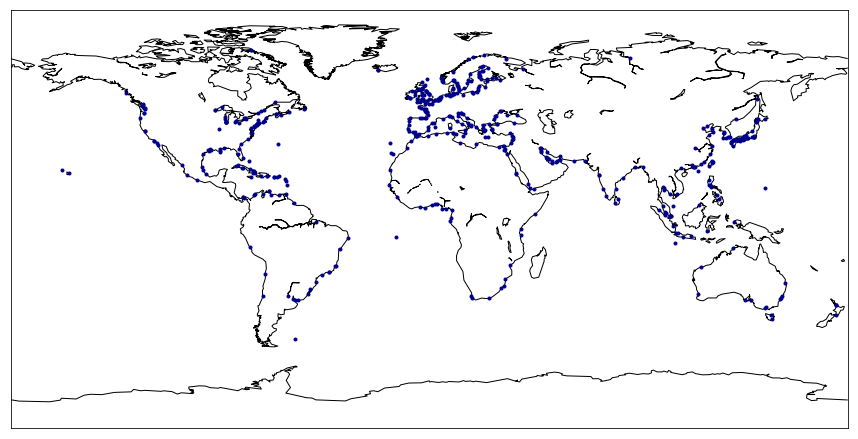

In [127]:
# Plot the V sized ports
# Plotting the civil airports

plt.figure(figsize=(15,15))
map = Basemap()
map.drawcoastlines()

for port in sizeMLPorts.index:
    map.plot(list(sizeMLPorts.loc[port].geometry.coords)[0][0],
            list(sizeMLPorts.loc[port].geometry.coords)[0][1],color='darkblue',marker='o',markersize=3)

plt.show()

In [128]:
sizeMLPorts.head()

,INDEX_NO,REGION_NO,PORT_NAME,COUNTRY,LATITUDE,LONGITUDE,LAT_DEG,LAT_MIN,LAT_HEMI,LONG_DEG,...,PROVISIONS,WATER,FUEL_OIL,DIESEL,DECKSUPPLY,ENG_SUPPLY,REPAIRCODE,DRYDOCK,RAILWAY,geometry
0,61160.0,61100.0,KUSHIRO KO,JP,42.983333,144.366667,42.0,59.0,N,144.0,...,Y,Y,Y,Y,Y,Y,C,None,M,POINT (144.3666666666667 42.98333333333333)
1,61170.0,61100.0,MURORAN KO,JP,42.350000,140.966667,42.0,21.0,N,140.0,...,None,Y,Y,None,None,None,A,M,L,POINT (140.9666666666667 42.35)
2,61190.0,61100.0,HAKODATE KO,JP,41.783333,140.716667,41.0,47.0,N,140.0,...,Y,Y,Y,Y,Y,Y,B,M,L,POINT (140.7166666666667 41.78333333333333)
3,61230.0,61100.0,OTARU KO,JP,43.200000,141.016667,43.0,12.0,N,141.0,...,Y,Y,Y,Y,Y,Y,C,None,S,POINT (141.0166666666667 43.2)
4,61385.0,61100.0,KAWASAKI KO,JP,35.500000,139.766667,35.0,30.0,N,139.0,...,Y,Y,Y,Y,Y,None,A,M,M,POINT (139.7666666666667 35.5)


#### Let's take a look at some cargo-related variables.

In [39]:
cargoColumns = [column for column in ports_1.columns if 'cargo' in column.lower()]

In [40]:
cargoColumns

['CARGODEPTH', 'CARGOWHARF', 'CARGO_ANCH']

In [41]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in ports_1[column]]) \
           for uniVal in ports_1[column].unique()},'\n')

CARGODEPTH

{'O': 339, 'J': 325, None: 453, 'K': 392, 'G': 121, 'F': 49, 'P': 268, 'H': 154, 'L': 457, 'M': 450, 'D': 12, 'E': 38, 'B': 15, 'N': 533, 'A': 25, 'Q': 29, 'C': 9} 

CARGOWHARF

{None: 875, 'Y': 2787, 'N': 7} 

CARGO_ANCH

{'Y': 1547, None: 2083, 'N': 39} 



And cargo variables for our sized-subset

In [129]:
for column in cargoColumns:
    print('%s\n' % column)
    print({uniVal:sum([True if obs == uniVal else False for obs in sizeMLPorts[column]]) \
           for uniVal in sizeMLPorts[column].unique()},'\n')

CARGODEPTH

{'G': 53, 'F': 18, 'B': 6, 'J': 83, 'L': 63, 'K': 70, 'H': 55, 'M': 64, 'N': 41, 'E': 21, 'D': 4, 'P': 3, None: 25, 'O': 10, 'C': 2, 'A': 3} 

CARGOWHARF

{'Y': 488, None: 33} 

CARGO_ANCH

{None: 300, 'Y': 211, 'N': 10} 



### Country distribution

In [132]:
print({C:sum([True if obs == C else False for obs in sizeMLPorts.COUNTRY]) for C in sizeMLPorts.COUNTRY.unique()},'\n')
print('\nThere are %i countries in the subset' % len(sizeMLPorts.COUNTRY.unique()))

{'JP': 37, 'ZA': 5, 'MZ': 2, 'TZ': 1, 'KE': 1, 'SO': 1, 'GB': 31, 'NL': 6, 'BE': 3, 'RU': 9, 'KR': 7, 'CN': 14, 'CM': 1, 'GA': 2, 'SH': 1, 'NG': 3, 'GN': 1, 'PH': 6, 'CI': 1, 'GH': 1, 'TG': 1, 'BJ': 1, 'TN': 3, 'MO': 1, 'DZ': 3, 'MA': 4, 'MR': 1, 'SN': 1, 'TR': 6, 'SY': 2, 'HK': 1, 'TW': 4, 'MY': 7, 'TH': 3, 'KH': 1, 'VN': 1, 'LB': 2, 'LY': 2, 'GU': 1, 'UA': 3, 'GR': 8, 'US': 59, 'NZ': 3, 'BG': 1, 'RO': 2, 'AU': 13, 'IT': 16, 'HR': 2, 'MT': 1, 'ID': 9, 'CX': 1, 'ES': 17, 'GI': 1, 'PT': 4, 'SG': 3, 'FR': 18, 'EG': 6, 'YE': 3, 'LK': 2, 'IN': 7, 'BD': 1, 'IR': 4, 'PK': 2, 'IE': 4, 'AE': 5, 'BH': 3, 'SA': 1, 'KW': 2, 'IQ': 1, 'SD': 2, 'CO': 2, 'PA': 3, 'MX': 7, 'CA': 18, 'DE': 9, 'DK': 3, 'CL': 2, 'FI': 12, 'PE': 1, 'BR': 11, 'EE': 1, 'LV': 3, 'LT': 1, 'PL': 4, 'SE': 13, 'QA': 1, 'AR': 3, 'VE': 3, 'GY': 1, 'MQ': 1, 'IL': 1, 'CW': 2, 'GP': 1, 'DO': 2, 'IS': 2, 'NO': 11, 'PR': 3, 'VG': 1, 'AG': 1, 'CU': 9, 'HT': 1, 'BM': 1, 'BS': 1, 'UY': 1, 'FK': 1, 'JM': 1, 'TT': 1} 


There are 107 countr

### End of exploratory stats
## Let's take a look at the UK Data

In [3]:
# Opening the Open Document Sheet
doc = ezodf.opendoc('Data Sources/UK Port Freight (2)/port-freight-statistics-2017/port0400.ods')
# Data sheet
sheet = doc.sheets[2]

In [11]:
# A way to extract the data
start = time.time()
totalContent = []
for i,row in enumerate(sheet.rows()):
    if i == 0:
        columns = [cell.value for cell in row]
        
        columns = columns[:-1]
        
#         individualUKPortData = pd.DataFrame(columns = columns)
    if 0 < i:
    
        content = [cell.value for cell in row]
        totalContent.append(content[:-1])
        
        #individualUKPortData.loc[i] = content
individualUKPortData = pd.DataFrame(totalContent,columns = columns)
end = time.time()

print('The processing took %.3f seconds' % (end-start))

The processing took 4.491 seconds


In [12]:
individualUKPortData.shape

(89893, 7)

In [14]:
individualUKPortData.head()

,Reporting Port,Year,direction,Cargo_Code,Region,Type,Value (thousands)
0,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Tonnage,330584.769968
1,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Tonnage,512502.510709
2,Aberdeen,2017.0,1.0,13.0,European Union traffic,Tonnage,81612.719323
3,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Units,0.000000
4,Aberdeen,2017.0,1.0,13.0,Domestic traffic,Units,0.000000


## Trade flows (Global)

In [292]:
tradeFlows = pd.read_csv('StructuredData.csv',parse_dates=['date'],index_col =0)
# Limiting the data to only 2017 for now.
tradeFlows = tradeFlows[((tradeFlows.date >='2017-01-01') & (tradeFlows.date <= '2017-12-01')) &\
                       (tradeFlows['product'] != 'TOTAL')]
tradeFlows = tradeFlows.reset_index(drop=True)
tradeFlows['product'] = tradeFlows['product'].astype(int)

In [293]:
tradeFlows.head()

,trade_value,product,product_description,date,partner,indicator_type,reporter,reporter_ISO
0,0.770370,1,Animals; live,2017-01-01,World,Export,Albania,ALB
1,0.044056,1,Animals; live,2017-01-01,World,Export,Algeria,DZA
2,0.071136,1,Animals; live,2017-01-01,World,Export,Andorra,AND
3,1242.319413,1,Animals; live,2017-01-01,World,Export,Australia,AUS
4,188.706390,1,Animals; live,2017-01-01,World,Export,Austria,AUT


In [294]:
######################### Restructuring data ###########################
# _______________________________________________________________________

hsMainCategories = ['animals_&_animal_products','vegetable_products','foodstuffs','mineral_products',
                    'chemicals_&_allied_industries','Plastics/Rubbers','raw_hides,_skins,_leather_&_furs',
                   'wood_&_wood_products','textiles','footwear_/_headgear','stone_/_glass','metals',
                   'machinery_/_electrical','transportation','miscellaneous','all_commodities']

hsMain = [(1,5),(6,15),(16,24),(25,27),(28,38),(39,40),(41,43),(44,49),
          (50,63),(64,67),(68,71),(72,83),(84,85),(86,89),(90,97),'TOTAL']

exports = [[] for i in np.arange(0,len(hsMain))]
imports = [[] for i in np.arange(0,len(hsMain))]

for country in tradeFlows.reporter.unique():
    
    # Only considering the relevant observations
    tempTradeFlows = tradeFlows[tradeFlows.reporter==country]
    tempTradeFlows = tempTradeFlows.reset_index(drop=True)
    for i,categories in enumerate(hsMain):
        # First export
        if type(categories) != str:

            exports[i].append(round(sum(tempTradeFlows[((tempTradeFlows['product'] >= categories[0]) &\
                                       (tempTradeFlows['product'] <= categories[1])) &\
                                       (tempTradeFlows.indicator_type == 'Export')].trade_value),3))
        else:
            exports[i].append(round(sum(tempTradeFlows[tempTradeFlows.indicator_type=='Export'].trade_value),3))

        # Then import
        if type(categories) != str:

            imports[i].append(round(sum(tempTradeFlows[((tempTradeFlows['product'] >= categories[0]) &\
                                        (tempTradeFlows['product'] <= categories[1])) &\
                                        (tempTradeFlows.indicator_type == 'Import')].trade_value),3))
        else:
            imports[i].append(round(sum(tempTradeFlows[tempTradeFlows.indicator_type=='Import'].trade_value),3))

combined = exports+imports

In [298]:
tradeFlowData = pd.DataFrame(index = tradeFlows.reporter.unique(),
                             columns=[category+'_export' for category in hsMainCategories]+\
                                     [category+'_import' for category in hsMainCategories])
for i,category in enumerate(combined):
    tradeFlowData.iloc[:,i] = category

In [299]:
tradeFlowData['ISO3'] = tradeFlows.reporter_ISO.unique()

In [300]:
tradeFlowData.head()

,animals_&_animal_products_export,vegetable_products_export,foodstuffs_export,mineral_products_export,chemicals_&_allied_industries_export,Plastics/Rubbers_export,"raw_hides,_skins,_leather_&_furs_export",wood_&_wood_products_export,textiles_export,footwear_/_headgear_export,...,wood_&_wood_products_import,textiles_import,footwear_/_headgear_import,stone_/_glass_import,metals_import,machinery_/_electrical_import,transportation_import,miscellaneous_import,all_commodities_import,ISO3
Albania,45.977,117.312,90.304,363.250,20.481,19.397,25.004,70.045,505.997,483.585,...,200.281,595.502,141.037,132.894,445.914,0,0,0,3870.776,ALB
Algeria,10.695,80.205,261.386,33881.056,775.930,4.071,14.322,24.729,4.037,0.076,...,1275.269,1148.929,229.642,736.244,6125.927,0,0,0,27901.888,DZA
Andorra,0.103,0.185,0.570,0.282,1.938,0.986,1.074,7.676,7.639,2.183,...,43.087,123.467,41.465,54.876,28.621,0,0,0,980.403,AND
Australia,13359.550,13594.924,6068.575,130041.556,11404.581,1129.160,830.780,2831.091,4877.269,101.818,...,5098.543,9317.837,2039.495,9153.566,8658.055,0,0,0,105024.359,AUS
Austria,2988.076,2010.525,7560.069,3482.885,17692.036,8023.097,938.017,10204.086,5635.865,1039.067,...,6835.825,8483.426,2021.509,4899.110,15626.314,0,0,0,93446.561,AUT


## Global Freight

In [262]:
globalFreight.shape

(264, 64)

In [263]:
tradeFlowData.shape

(143, 32)

In [265]:
# Let's examine some of the variables which could be expected to have not variation.
print('All Columns: \n\n',globalFreight.columns,'\n')
print('Unique values in "Indicator Name": ',globalFreight['Indicator Name'].unique(),'\n')
print('Unique values in "Indicator Code": ',globalFreight['Indicator Code'].unique(),'\n')

All Columns: 

 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object') 

Unique values in "Indicator Name":  ['Air transport, freight (million ton-km)'] 

Unique values in "Indicator Code":  ['IS.AIR.GOOD.MT.K1'] 



In [266]:
globalFreight = globalFreight[['Country Name','Country Code','2013','2014','2015','2016','2017']]

In [267]:
globalFreight.head()

,Country Name,Country Code,2013,2014,2015,2016,2017
0,Aruba,ABW,0.000000,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,AFG,84.621216,34.283472,33.102039,29.010881,25.144211
2,Angola,AGO,70.431000,65.517000,46.043000,43.940435,67.913802
3,Albania,ALB,0.000000,0.000000,0.000000,0.000000,0.000000
4,Andorra,AND,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
print('Countries with a value of zero:\n')
print({year:sum([1 if value == float(0) else 0 for value in globalFreight[year]])\
       for year in ['2013','2014','2015','2016','2017']})
print('\nIn percentage of the number of countries available: \n')
print({year:round(sum([1 if value == float(0) else 0 for value in globalFreight[year]])/globalFreight.shape[0],3)\
       for year in ['2013','2014','2015','2016','2017']})

Countries with a value of zero:

{'2013': 75, '2014': 77, '2015': 80, '2016': 81, '2017': 86}

In percentage of the number of countries available: 

{'2013': 0.284, '2014': 0.292, '2015': 0.303, '2016': 0.307, '2017': 0.326}


## Global Passengers

In [62]:
globalPassengers.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,0.0,0.0,0.0,0.0,0.0,0.0,...,1999127.0,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1858558.0,0.0,0.0
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,0.0,0.0,0.0,0.0,0.0,0.0,...,1010194.0,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1581201.0,0.0,0.0
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,0.0,0.0,0.0,0.0,0.0,0.0,...,768533.0,8.297789e+05,8.143397e+05,865848.0,151632.0,0.0,26634.0,103151.0,0.0,0.0
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
# Let's examine some of the variables which could be expected to have not variation.
print('All Columns: \n\n',globalPassengers.columns,'\n')
print('Unique values in "Indicator Name": ',globalPassengers['Indicator Name'].unique(),'\n')
print('Unique values in "Indicator Code": ',globalPassengers['Indicator Code'].unique(),'\n')

All Columns: 

 Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object') 

Unique values in "Indicator Name":  ['Air transport, passengers carried'] 

Unique values in "Indicator Code":  ['IS.AIR.PSGR'] 



In [310]:
globalPassengers = globalPassengers[['Country Name','Country Code','2013','2014','2015','2016','2017']]

In [311]:
globalPassengers.head()

,Country Name,Country Code,2013,2014,2015,2016,2017
0,Aruba,ABW,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,AFG,2044188.0,2209428.0,1929907.0,1917924.0,1858558.0
2,Angola,AGO,1321872.0,1409952.0,1244491.0,1482546.0,1581201.0
3,Albania,ALB,865848.0,151632.0,0.0,26634.0,103151.0
4,Andorra,AND,0.0,0.0,0.0,0.0,0.0


In [312]:
print('Countries with a value of zero:\n')
print({year:sum([1 if value == float(0) else 0 for value in globalPassengers[year]])\
       for year in ['2013','2014','2015','2016','2017']})
print('\nIn percentage of the number of countries available: \n')
print({year:round(sum([1 if value == float(0) else 0 for value in globalPassengers[year]])/globalPassengers.shape[0],3)\
       for year in ['2013','2014','2015','2016','2017']})

Countries with a value of zero:

{'2013': 62, '2014': 63, '2015': 64, '2016': 63, '2017': 65}

In percentage of the number of countries available: 

{'2013': 0.235, '2014': 0.239, '2015': 0.242, '2016': 0.239, '2017': 0.246}


### Let's compare with the 'countries' shapefile

In [313]:
print('The number of matching entities in the global freight data are:',sum([1 if country in list(countries.NAME_EN) else 0\
                                                                        for country in globalFreight['Country Name']]),'\n')
print('The number of matching entities in the global passenger data are:',sum([1 if country in list(countries.NAME_EN) else 0\
                                                                            for country in globalPassengers['Country Name']]))

The number of matching entities in the global freight data are: 179 

The number of matching entities in the global passenger data are: 179


### Let's compare with the airport shapefile

In [314]:
print('The number of matching entities in the global freight data are:',sum([1 if country in list(airports.NAME) else 0\
                                                                        for country in globalFreight['Country Name']]),'\n')
print('The number of matching entities in the global passenger data are:',sum([1 if country in list(airports.NAME) else 0\
                                                                            for country in globalPassengers['Country Name']]))

The number of matching entities in the global freight data are: 151 

The number of matching entities in the global passenger data are: 151


## Merging the global freight, passenger and trade flow data together

In [324]:
merged1 = tradeFlowData.merge(globalFreight[['Country Code','2017']],left_on = 'ISO3',right_on='Country Code')
merged2 = merged1.merge(globalPassengers[['Country Code','2017']],left_on='ISO3',right_on='Country Code')

In [326]:
merged2 = merged2.drop(['Country Code_x','Country Code_y'],axis=1)

In [336]:
newColumns=list(merged2.columns)
# Changing names on the merged columns
newColumns[-2] = 'freight_2017'
newColumns[-1] = 'passengers_2017'

# Replacing
merged2.columns = newColumns

In [364]:
combinedCountryData = merged2.merge(countries[[True if country in list(merged2.ISO3) else\
                                               False for country in countries.ISO_A3]][['ISO_A3','geometry']],
                                   left_on = 'ISO3',right_on='ISO_A3')
combinedCountryData = combinedCountryData.drop(['ISO_A3'],axis=1)

In [365]:
combinedCountryData.columns

Index(['animals_&_animal_products_export', 'vegetable_products_export',
       'foodstuffs_export', 'mineral_products_export',
       'chemicals_&_allied_industries_export', 'Plastics/Rubbers_export',
       'raw_hides,_skins,_leather_&_furs_export',
       'wood_&_wood_products_export', 'textiles_export',
       'footwear_/_headgear_export', 'stone_/_glass_export', 'metals_export',
       'machinery_/_electrical_export', 'transportation_export',
       'miscellaneous_export', 'all_commodities_export',
       'animals_&_animal_products_import', 'vegetable_products_import',
       'foodstuffs_import', 'mineral_products_import',
       'chemicals_&_allied_industries_import', 'Plastics/Rubbers_import',
       'raw_hides,_skins,_leather_&_furs_import',
       'wood_&_wood_products_import', 'textiles_import',
       'footwear_/_headgear_import', 'stone_/_glass_import', 'metals_import',
       'machinery_/_electrical_import', 'transportation_import',
       'miscellaneous_import', 'all_commo

In [366]:
gpdCombinedData = gpd.GeoDataFrame(combinedCountryData,geometry=combinedCountryData.geometry)

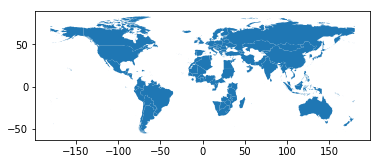

In [369]:
gpdCombinedData.plot()

In [373]:
len(tradeFlows.reporter_ISO.unique())

143

In [374]:
# Based on this answer: https://gis.stackexchange.com/questions/159681/geopandas-cant-save-geojson
with open('Final Data/globalData.geojson', 'w') as f:
    f.write(gpdCombinedData.to_json())

In [375]:
combinedCountryData.to_csv('Final Data/globalData.csv')